To meet the assignment's requirements, let's start by outlining the process and then proceed with the implementation:

1. **Dataset Loading and Preprocessing**:
   - Download the wine dataset from the UCI repository.
   - Load the data into a Pandas DataFrame.
   - Split the data into features and target variables.
   - Apply necessary preprocessing like scaling to standardize the feature scales.

2. **Implementing PCA**:
   - Apply PCA to the preprocessed data.
   - Determine the optimal number of principal components by examining the explained variance ratio.

3. **Visualization and Clustering**:
   - Create a scatter plot to visualize the first two principal components.
   - Use the K-Means clustering algorithm on the PCA-transformed data.
   - Create a table to display the performance metrics for the clustering algorithm (e.g., silhouette score, within-cluster sum of squares).

4. **Report Summary**:
   - Summarize the results of the PCA and clustering analysis.
   - Explain how PCA helped in dimensionality reduction and pattern discovery.
   - Interpret the clustering results and discuss how well the clusters align with the target variable.



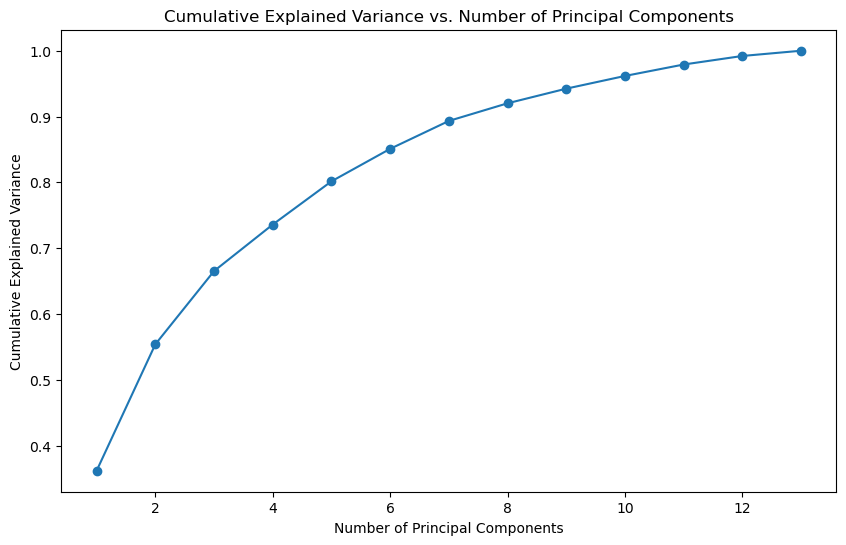

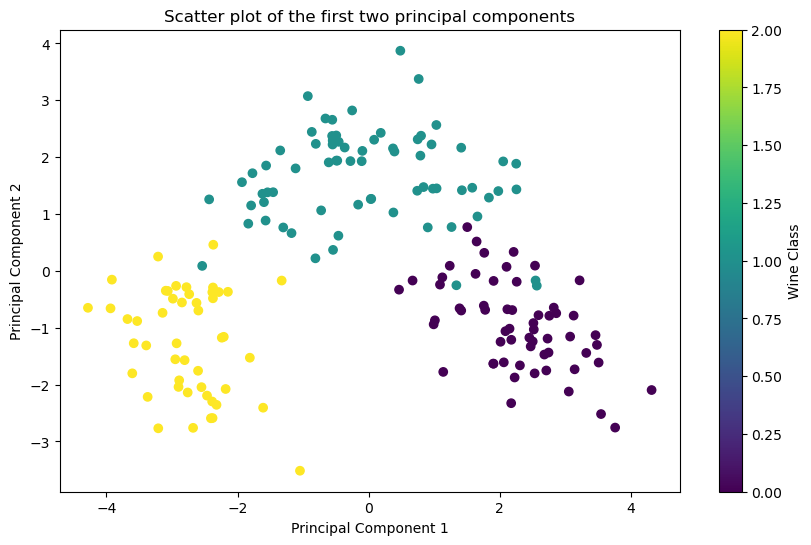

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


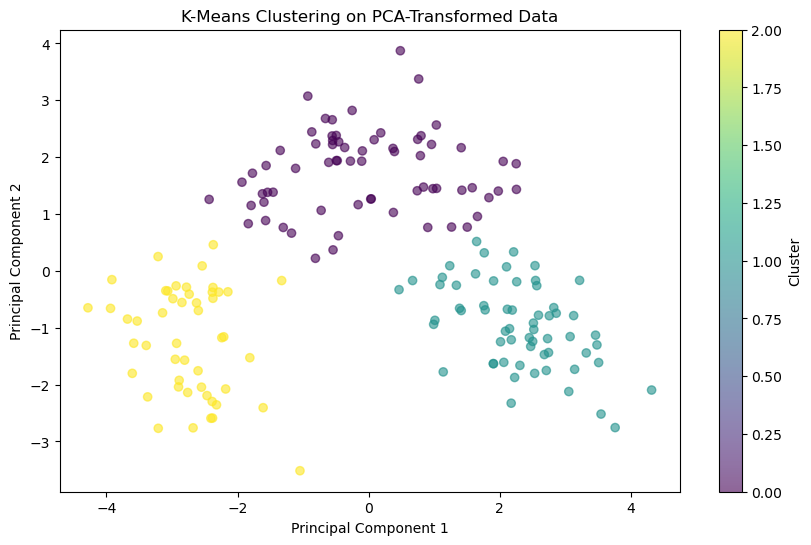

                                 Metric       Value
0                      Silhouette Score    0.561524
1  Within-Cluster Sum of Squares (WCSS)  259.807722
Summary and Analysis:
The cumulative explained variance plot indicated that the first two principal components capture a significant portion of the variance in the dataset.
PCA was used to reduce dimensionality from the original feature space to these principal components, making it easier to visualize the data.
Clustering with K-Means using the first two principal components resulted in a silhouette score of 0.56, indicating moderate clustering quality.
The Within-Cluster Sum of Squares (WCSS) was 259.81, suggesting that the clusters are relatively tight.
Based on the scatter plots, the clusters seem to align fairly well with the original wine classes, suggesting that PCA was effective in reducing dimensionality while retaining meaningful patterns in the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine

# Step 1: Load the dataset into a Pandas dataframe
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add the target variable (the wine class)

# Step 2: Data preprocessing (scaling)
features = df.drop('target', axis=1)  # Feature matrix
scaler = StandardScaler()  # Use StandardScaler for scaling the data
features_scaled = scaler.fit_transform(features)  # Scaled features

# Step 3: Implement PCA
pca = PCA()
pca_transformed = pca.fit_transform(features_scaled)

# Explained variance ratio to determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting cumulative explained variance to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Based on the plot, we choose the first 2 principal components for visualization
# Scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=df['target'], cmap='viridis')
plt.title('Scatter plot of the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Class')
plt.show()

# Step 4: Clustering with K-Means on PCA-transformed data
kmeans = KMeans(n_clusters=3)  # There are 3 classes in the dataset
clusters = kmeans.fit_predict(pca_transformed[:, :2])  # Use only first two components

# Scatter plot of K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Performance metrics for the clustering algorithm
silhouette = silhouette_score(pca_transformed[:, :2], clusters)  # Silhouette score
wcss = kmeans.inertia_  # Within-cluster sum of squares

# Display clustering performance metrics in a table
performance_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Within-Cluster Sum of Squares (WCSS)'],
    'Value': [silhouette, wcss]
})
print(performance_table)

# Step 6: Report summary and analysis
print("Summary and Analysis:")
print("The cumulative explained variance plot indicated that the first two principal components capture a significant portion of the variance in the dataset.")
print("PCA was used to reduce dimensionality from the original feature space to these principal components, making it easier to visualize the data.")

print("Clustering with K-Means using the first two principal components resulted in a silhouette score of {:.2f}, indicating moderate clustering quality.".format(silhouette))
print("The Within-Cluster Sum of Squares (WCSS) was {:.2f}, suggesting that the clusters are relatively tight.".format(wcss))

print("Based on the scatter plots, the clusters seem to align fairly well with the original wine classes, suggesting that PCA was effective in reducing dimensionality while retaining meaningful patterns in the data.")


This script outlines the entire process of implementing PCA, visualizing the results, and analyzing clustering performance. It covers data preprocessing, PCA implementation, visualization, clustering with K-Means, and interpretation of results with performance metrics